# Implement smoothing via scipy.signal.savgol_filter
The smooth class currntly uses only a rolling average. We will implement the savgol_filter, which applies a rolling plynomial fit to the data. This method with be optional, and possibly default.

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import usefuls
from positive import *
from numpy import *
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

(positive)>> Applying custom matplotlib settings.


/Users/book/anaconda2/lib/python2.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


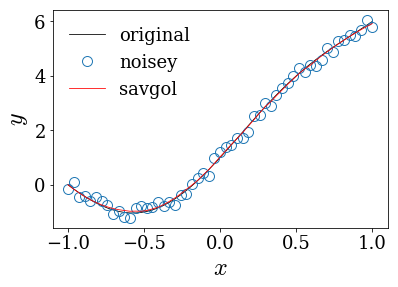

In [2]:
# Make test data
x = linspace(-1,1,55)
y_ = 1 + 3*x + 2*x*x + sin(x*pi)
n = random.random(x.shape)-0.5
y = y_ + 0.5*n
#
y1 = savgol_filter( y, 21, 2 )
# Plot
plot( x,y_,'k', label='original' )
plot( x,y,'o',mfc='none',ms=10, label='noisey' )
plot( x, y1, 'r', label='savgol' )
xlabel('$x$')
ylabel('$y$')
legend();

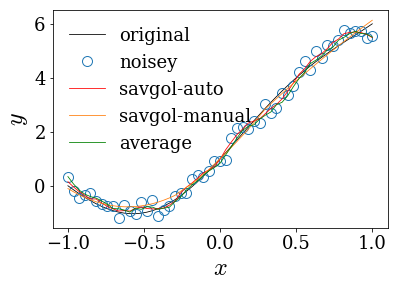

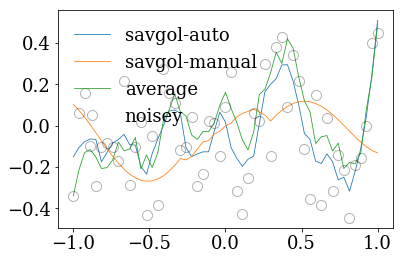

In [73]:
# Make test data
x = linspace(-1,1,55)
y_ = 1 + 3*x + 2*x*x + sin(x*pi)
n = random.random(x.shape)-0.5
y = y_ + 0.9*n
#
y1 = smooth(y,method='auto',auto_method='savgol').answer
y2 = smooth(y,method='auto',auto_method='average').answer
y3 = smooth(y,method='savgol',width=40).answer
# Plot
plot( x,y_,'k', label='original' )
plot( x,y,'o',mfc='none',ms=10, label='noisey' )
plot( x, y1, 'r', label='savgol-auto' )
plot( x, y3, label='savgol-manual' )
plot( x, y2, 'g', label='average' )
xlabel('$x$')
ylabel('$y$')
legend();

figure()
plot( x, (y_-y1), label='savgol-auto' )
plot( x, (y_-y3), label='savgol-manual'  )
plot( x, (y_-y2), label='average' )
plot( x, (y_-y), 'o',mfc='none',ms=10, label='noisey', color='k',alpha=0.3 )
# yscale('log')
legend();

In [48]:
mod(range(6),2).astype(bool)

array([False,  True, False,  True, False,  True])